**Thinkful - 3.3.3 - Drill - Lasso Regression**

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv('Data/Default.csv').iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

**Ridge and Lasso Regression with steps Alpha = 5000**

Using very large steps for alpha, we can see that the R-squared values for ridge regression stabilize at ~Alpha = 300,000

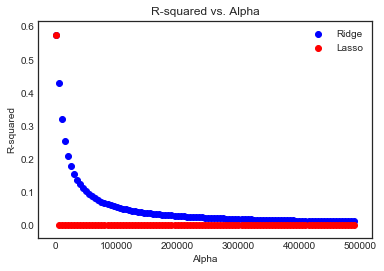

In [23]:
alphaStep = []
R2_ridge = []
R2_lasso = []
Alph_1 = 0.01
i = 1

while i < 100:
    
    #Ridge Regression
    ridgeregr = linear_model.Ridge(alpha=Alph_1, fit_intercept=False) 
    ridgeregr.fit(X_train, Y_train)
    R2_ridge.append(ridgeregr.score(X_train, Y_train))
    
    # Lasso Regression
    lass = linear_model.Lasso(alpha=Alph_1)
    lassfit = lass.fit(X_train, Y_train)
    R2_lasso.append(lass.score(X_train, Y_train))
    
    # Iterate
    alphaStep.append(Alph_1)
    i += 1
    Alph_1 += 5000

# Plot Results
plt.scatter(alphaStep,R2_ridge,color='blue')
plt.scatter(alphaStep,R2_lasso,color='red')
plt.legend(['Ridge', 'Lasso'])
plt.title('R-squared vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.show()

**Ridge and Lasso Regression with steps Alpha = 0.01**

Using very large steps for alpha, we can see that the R-squared values for lasso regression stabilize at ~Alpha = 0.75.

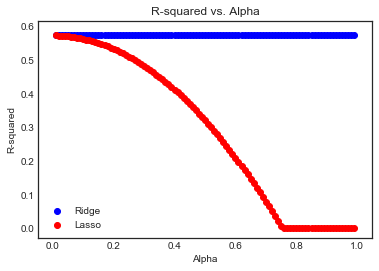

In [24]:
alphaStep = []
R2_ridge = []
R2_lasso = []
Alph_1 = 0.01
i = 1

while i < 100:
    
    #Ridge Regression
    ridgeregr = linear_model.Ridge(alpha=Alph_1, fit_intercept=False) 
    ridgeregr.fit(X_train, Y_train)
    R2_ridge.append(ridgeregr.score(X_train, Y_train))
    
    # Lasso Regression
    lass = linear_model.Lasso(alpha=Alph_1)
    lassfit = lass.fit(X_train, Y_train)
    R2_lasso.append(lass.score(X_train, Y_train))
    
    # Iterate
    alphaStep.append(Alph_1)
    i += 1
    Alph_1 += 0.01

# Plot Results
plt.scatter(alphaStep,R2_ridge,color='blue')
plt.scatter(alphaStep,R2_lasso,color='red')
plt.legend(['Ridge', 'Lasso'])
plt.title('R-squared vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.show()